In [4]:
using Pkg;
Pkg.activate(".")
Pkg.add("BenchmarkTools")
Pkg.add("DataFrames")
Pkg.add("QuantumOptics")
Pkg.add("PyPlot")



Pkg.update()
Pkg.status()

Status `~/Desktop/Research/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [a93c6f00] DataFrames v1.4.3
  [91a5bcdd] Plots v1.36.2
  [d330b81b] PyPlot v2.11.0
  [6e0679c1] QuantumOptics v1.0.7


  Activating project at `~/Desktop/Research`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Project.toml`
  No Changes to `~/Desktop/Research/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Project.toml`
  No Changes to `~/Desktop/Research/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Project.toml`
  No Changes to `~/Desktop/Research/Manifest.toml`
   Resolving package versions...
    Updating `~/Desktop/Research/Project.toml`
  [d330b81b] + PyPlot v2.11.0
    Updating `~/Desktop/Research/Manifest.toml`
  [8f4d0f93] + Conda v1.7.0
  [438e738f] + PyCall v1.94.1
  [d330b81b] + PyPlot v2.11.0
  [81def892] + VersionParsing v1.3.0
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/Research/Project.toml`
  No Changes to `~/Desktop/Research/Manifest.toml`


In [5]:
using QuantumOptics
using PyPlot

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1662
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/richellejadetuquero/.julia/packages/PyCall/ygXW2/src/PyCall.jl:719
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/richellejadetuquero/.julia/packages/Conda/x2UxR/src/Conda.jl:127


LoadError: InitError: PyError (PyImport_ImportModule

The Python package matplotlib could not be imported by pyimport. Usually this means
that you did not install matplotlib in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the matplotlib module, you can
use `pyimport_conda("matplotlib", PKG)`, where PKG is the Anaconda
package that contains the module matplotlib, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ImportError'>
ImportError('\n\nIMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!\n\nImporting the numpy C-extensions failed. This error can happen for\nmany reasons, often due to issues with your setup or how NumPy was\ninstalled.\n\nWe have compiled some common reasons and troubleshooting tips at:\n\n    https://numpy.org/devdocs/user/troubleshooting-importerror.html\n\nPlease note and check the following:\n\n  * The Python version is: Python3.10 from "/Users/richellejadetuquero/.julia/conda/3/bin/python"\n  * The NumPy version is: "1.22.1"\n\nand make sure that they are the versions you expect.\nPlease carefully study the documentation linked above for further help.\n\nOriginal error was: dlopen(/Users/richellejadetuquero/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so, 2): no suitable image found.  Did find:\n\t/Users/richellejadetuquero/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so: mach-o, but wrong architecture\n\t/Users/richellejadetuquero/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so: mach-o, but wrong architecture\n')
  File "/Users/richellejadetuquero/.local/lib/python3.10/site-packages/matplotlib/__init__.py", line 104, in <module>
    import numpy
  File "/Users/richellejadetuquero/.local/lib/python3.10/site-packages/numpy/__init__.py", line 144, in <module>
    from . import core
  File "/Users/richellejadetuquero/.local/lib/python3.10/site-packages/numpy/core/__init__.py", line 49, in <module>
    raise ImportError(msg)

during initialization of module PyPlot

In [13]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/Desktop/Research/Project.toml`
  No Changes to `~/Desktop/Research/Manifest.toml`


In [6]:
using Random; Random.seed!(0)
η = 0.9 # Pumping strength
κ = 1 # Decay rate

Ncutoff = 20 # Maximum photon number
T = [0:0.1:10;];

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

In [7]:
basis = FockBasis(20)
a = destroy(basis)
at = create(basis)
n = number(basis)
H = η*(a+at)
J = [sqrt(κ)*a]

1-element Vector{Operator{FockBasis{Int64}, FockBasis{Int64}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}}}:
 Operator(dim=21x21)
  basis: Fock(cutoff=20)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], ComplexF64[1.0 + 0.0im, 1.4142135623730951 + 0.0im, 1.7320508075688772 + 0.0im, 2.0 + 0.0im, 2.23606797749979 + 0.0im, 2.449489742783178 + 0.0im, 2.6457513110645907 + 0.0im, 2.8284271247461903 + 0.0im, 3.0 + 0.0im, 3.1622776601683795 + 0.0im, 3.3166247903554 + 0.0im, 3.4641016151377544 + 0.0im, 3.605551275463989 + 0.0im, 3.7416573867739413 + 0.0im, 3.872983346207417 + 0.0im, 4.0 + 0.0im, 4.123105625617661 + 0.0im, 4.242640687119285 + 0.0im, 4.358898943540674 + 0.0im, 4.47213595499958 + 0.0im], 21, 21)

In [8]:
Ψ₀ = fockstate(basis, 10)
ρ₀ = Ψ₀ ⊗ dagger(Ψ₀)

Operator(dim=21x21)
  basis: Fock(cutoff=20)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im 

In [9]:
tout, ρt_master = timeevolution.master(T, ρ₀, H, J)


([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], Operator{FockBasis{Int64}, FockBasis{Int64}, Matrix{ComplexF64}}[Operator(dim=21x21)
  basis: Fock(cutoff=20)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0

In [10]:
tout_example1, Ψt_example1 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(1),
                                        display_beforeevent=true,
                                        display_afterevent=true)

tout_example2, Ψt_example2 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(2),
                                        display_beforeevent=true,
                                        display_afterevent=true)

tout_example3, Ψt_example3 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(3),
                                        display_beforeevent=true,
                                        display_afterevent=true)

([0.0, 0.1, 0.1670105017251832, 0.1670105017251832, 0.2, 0.3, 0.4, 0.5, 0.6, 0.6934475628415889  …  9.47462146836559, 9.4, 9.5, 9.6, 9.694188995785389, 9.694188995785389, 9.7, 9.8, 9.9, 10.0], Ket{FockBasis{Int64}, Vector{ComplexF64}}[Ket(dim=21)
  basis: Fock(cutoff=20)
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im, Ket(dim=21)
  basis: Fock(cutoff=20)
           -2.347e-14 + 0.0im
                  0.0 - 2.5396e-12im
        1.7486967e-10 + 0.0im
                  0.0 + 8.73820598e-9im
     -3.3082039308e-7 + 0.0im
                  0.0 - 9.5979614076e-6im
  0.00021165974352977 + 0.0im
                  0.0 + 0.00345192964809626im
  -0.0393773230678252 + 0.0im
                  0.0 - 0.28020451184462564im
   0.9168165760890101 + 0.0im
                  0.0 - 0.

In [11]:
Ntrajectories = 50

n_average = zeros(Float64, length(T))
function fout(t::Float64, psi::Ket)
    i = findfirst(isequal(t), T)
    n_average[i] += real(expect(n, psi)/norm(psi)^2)
end

for i=1:Ntrajectories
    timeevolution.mcwf(T, Ψ₀, H, J; fout=fout)
end
n_average /= Ntrajectories

101-element Vector{Float64}:
 10.0
  9.126648521132614
  8.36483193762618
  7.6826633859274285
  7.018981236740433
  6.373074638257982
  5.848815425291124
  5.3703790514754175
  4.971678431710074
  4.581391637144884
  4.345966856653487
  4.017306783788174
  3.6829231444481194
  ⋮
  3.174230185228799
  3.177482843281436
  3.180632658204101
  3.1835162887830433
  3.1865435823043877
  3.1888753229240594
  3.191478178124316
  3.1937367459776884
  3.196109832900129
  3.1983407719903063
  3.200309092643629
  3.20208648880791

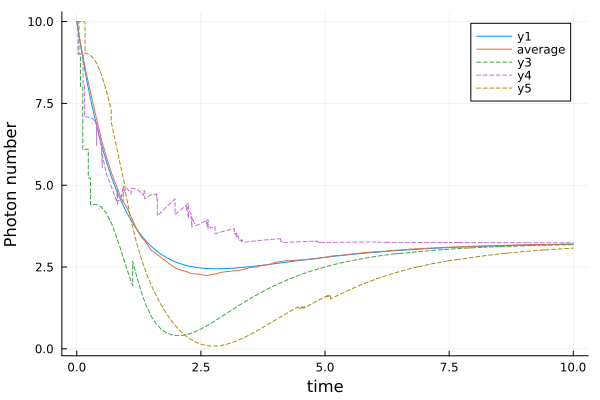

In [30]:
plot(T, real(expect(n, ρt_master)))
plot!(T, n_average, label = "average")
plot!(tout_example1, real(expect(n, Ψt_example1)), linestyle = :dash)
plot!(tout_example2, real(expect(n, Ψt_example2)), linestyle = :dash)
plot!(tout_example3, real(expect(n, Ψt_example3)), linestyle = :dash, 
    xlabel= "time", ylabel = "Photon number")




In [ ]:
H0 = -Δ*at*a + Uj/2*at*at*a*a+Fj*at+conj(Fj)*a
Hint = g*(at ⊗ sm + a ⊗ sp)
H = H0 - Hint; 


In [32]:
?FockBasis

search: FockBasis



```
FockBasis(N,offset=0)
```

Basis for a Fock space where `N` specifies a cutoff, i.e. what the highest included fock state is. Similarly, the `offset` defines the lowest included fock state (default is 0). Note that the dimension of this basis is `N+1-offset`.


In [33]:
b_fock=FockBasis(10) 
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)  

Operator(dim=11x11)
  basis: Fock(cutoff=10)sparse([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ComplexF64[1.0 + 0.0im, 2.0 + 0.0im, 3.0 + 0.0im, 4.0 + 0.0im, 5.0 + 0.0im, 6.0 + 0.0im, 7.0 + 0.0im, 8.0 + 0.0im, 9.0 + 0.0im, 10.0 + 0.0im], 11, 11)